<a href="https://colab.research.google.com/github/deryabol/Machine_Learning/blob/main/pca_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [4]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [8]:
classes= np.unique(y_train)
nClasses=len(classes)
print("Total number of outputs", nClasses)
print("Output classes: ", classes)


Total number of outputs 10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


In [20]:
label_dict={0:'airplane',
            1:'automobile',
            2:'bird',
            3:'cat',
            4:'deer',
            5:'dog',
            6:'frog',
            7:'horse',
            8:'ship',
            9:'truck',
            }


Text(0.5, 1.0, 'Label:frog)')
Text(0.5, 1.0, 'Label:cat)')


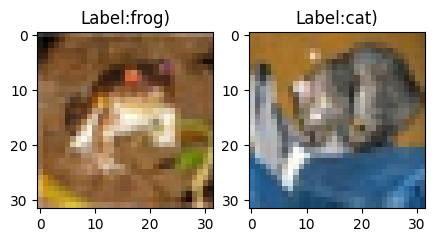

In [22]:
plt.figure(figsize=[5,5])

plt.subplot(121)
curr_img= np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("Label:" + str(label_dict[y_train[0][0]])+")"))

plt.subplot(122)
curr_img= np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("Label:" + str(label_dict[y_test[0][0]])+")"))


In [23]:
np.min(x_train), np.max(x_train)

(0, 255)

In [25]:
x_train=x_train/255.0

In [27]:
np.min(x_train), np.max(x_train)

(0.0, 0.00392156862745098)

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
x_train_flat=x_train.reshape(-1, 3072)
feat_cols=["pixel"+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat, columns=feat_cols)
df_cifar['label']=y_train
print("Size of dataframe: {}".format(df_cifar.shape))

Size of dataframe: (50000, 3073)


In [34]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.000907,0.000953,0.000969,0.000661,0.000707,0.000692,0.000769,0.000738,0.000661,0.001046,...,0.003322,0.002830,0.002153,0.002322,0.001815,0.001292,0.001892,0.001415,0.001107,6
1,0.002368,0.002722,0.002876,0.001938,0.002107,0.002092,0.001615,0.001599,0.001461,0.001569,...,0.002199,0.002045,0.002138,0.002199,0.002061,0.002184,0.002199,0.002045,0.002215,9
2,0.003922,0.003922,0.003922,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,...,0.001200,0.001307,0.001276,0.001215,0.001307,0.001276,0.001230,0.001323,0.001292,9
3,0.000431,0.000384,0.000154,0.000569,0.000523,0.000292,0.000584,0.000538,0.000308,0.000646,...,0.000830,0.000723,0.000431,0.000969,0.000861,0.000569,0.001107,0.001000,0.000707,4
4,0.002614,0.002768,0.003045,0.002584,0.002737,0.003014,0.002722,0.002845,0.003122,0.002814,...,0.001153,0.001215,0.001261,0.001092,0.001153,0.001200,0.001123,0.001184,0.001230,1


In [38]:
from sklearn.decomposition import PCA
pca_cifar=PCA(n_components=2)
principalomponent_cifar=pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [40]:
principal_cifar_Df=pd.DataFrame(data=principalomponent_cifar,
                                columns=["principal component 1", "principal component 2"])
principal_cifar_Df['y']=y_train
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-0.025102,0.010702,6
1,0.003254,-0.003725,9
2,0.030315,-0.045185,9
3,-0.040580,0.000042,4
4,-0.010297,-0.019487,1


In [41]:
pca_cifar.explained_variance_ratio_

array([0.2907663 , 0.11253144])

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

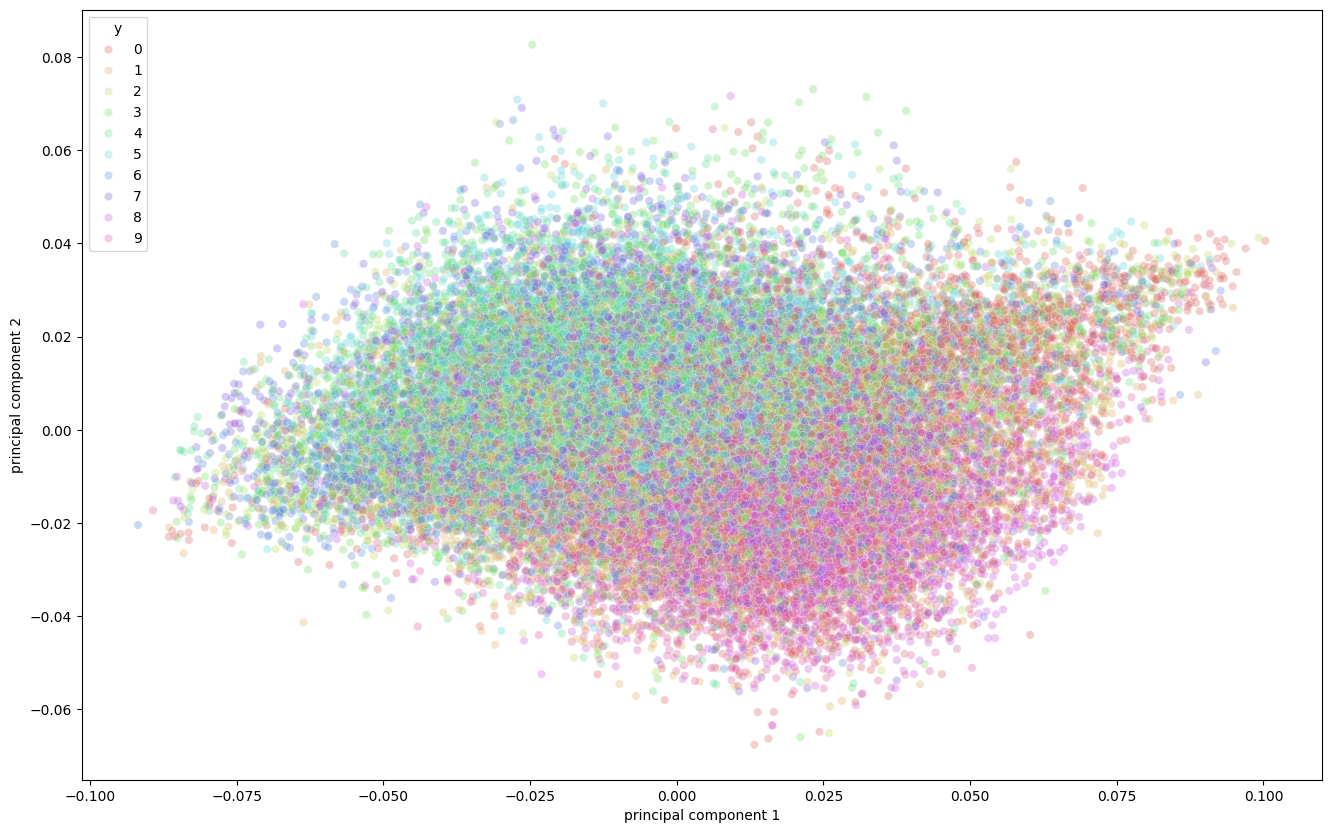

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)